## Partie 1

### 1- Equation differencielle avec les valeurs de l'exo
dP/dt = 0.05 * P * (1 - P/100000)

### 2- L'intérprétation : 
Au début (P petit), le terme (1 - P/K) est proche de 1, donc la croissance est presque exponentielle
À la fin (P proche de K), le terme (1 - P/K) tend vers 0, donc la croissance ralentit.

### 3- méthode de discrétisation : 
En prenant un pas t = 0.1 on aura : 
$$
P_{n+1} = P_n + 0.1 \cdot \left( 0.05 P_n \left( 1 - \frac{P_n}{100000} \right) \right)
$$

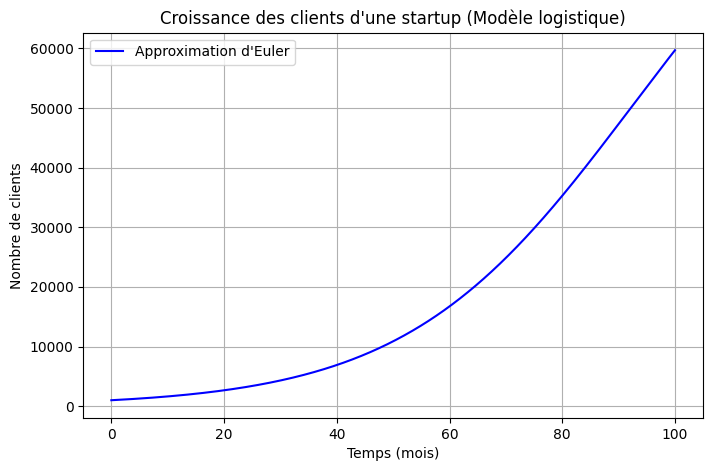

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres du modèle
r = 0.05  # Taux de croissance
K = 100000  # Capacité du marché
P0 = 1000  # Clients initiaux

dt = 0.1  # Pas de temps (mois)
t_max = 100  # Durée de simulation (mois)
n_steps = int(t_max / dt)  # Nombre de pas de temps

# Initialisation des listes de temps et de population
temps = np.linspace(0, t_max, n_steps)
P = np.zeros(n_steps)
P[0] = P0  # Condition initiale

# Simulation par la méthode d'Euler
for i in range(1, n_steps):
    P[i] = P[i-1] + dt * (r * P[i-1] * (1 - P[i-1] / K))

# Affichage des résultats
plt.figure(figsize=(8, 5))
plt.plot(temps, P, label="Approximation d'Euler", color='b')
plt.xlabel("Temps (mois)")
plt.ylabel("Nombre de clients")
plt.title("Croissance des clients d'une startup (Modèle logistique)")
plt.legend()
plt.grid()
plt.show()


## Partie 2 
### 1- 
Lancement exponentiel : Au début, quand P est petit par rapport à K, l'équation devient : 
$$
\frac{dP}{dt} \approx r P
$$
ce qui correspond à une croissance exponentielle.

Saturation : Lorsque P se rapproche de K, le terme 
(1−𝑃/𝐾) tend vers 0, ralentissant la croissance jusqu'à une stabilisation à K.

Erreur quadratique moyenne (MSE) : 28955.446932694016


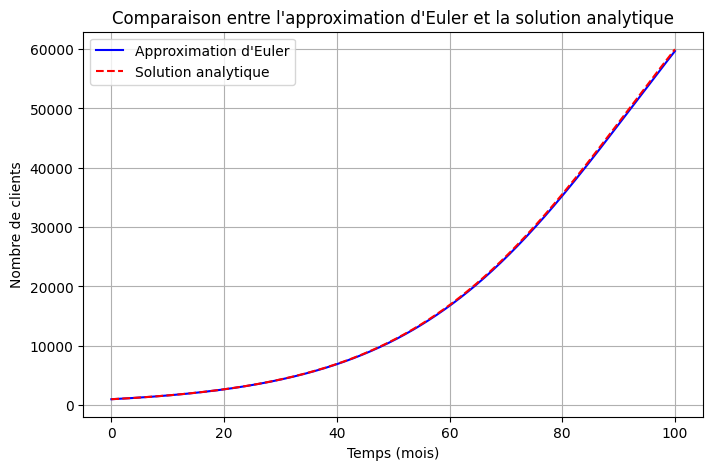

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Paramètres du modèle
r = 0.05  # Taux de croissance
K = 100000  # Capacité du marché
P0 = 1000  # Clients initiaux

dt = 0.1  # Pas de temps (mois)
t_max = 100  # Durée de simulation (mois)
n_steps = int(t_max / dt)  # Nombre de pas de temps

# Initialisation des listes de temps et de population
temps = np.linspace(0, t_max, n_steps)
P = np.zeros(n_steps)
P[0] = P0  # Condition initiale

# Simulation par la méthode d'Euler
for i in range(1, n_steps):
    P[i] = P[i-1] + dt * (r * P[i-1] * (1 - P[i-1] / K))

# Solution analytique
def logistic_solution(t, r, K, P0):
    return (K * P0) / (P0 + (K - P0) * np.exp(-r * t))

P_analytique = logistic_solution(temps, r, K, P0)

# Calcul de la MSE
mse = mean_squared_error(P, P_analytique)
print(f"Erreur quadratique moyenne (MSE) : {mse}")

# Affichage des résultats
plt.figure(figsize=(8,5))
plt.plot(temps, P, label="Approximation d'Euler", color='b')
plt.plot(temps, P_analytique, label="Solution analytique", color='r', linestyle='dashed')
plt.xlabel("Temps (mois)")
plt.ylabel("Nombre de clients")
plt.title("Comparaison entre l'approximation d'Euler et la solution analytique")
plt.legend()
plt.grid()
plt.show()

## Partie 3 

MSE Euler : 3434763.938178852
MSE Solution analytique : 5258889.591254078


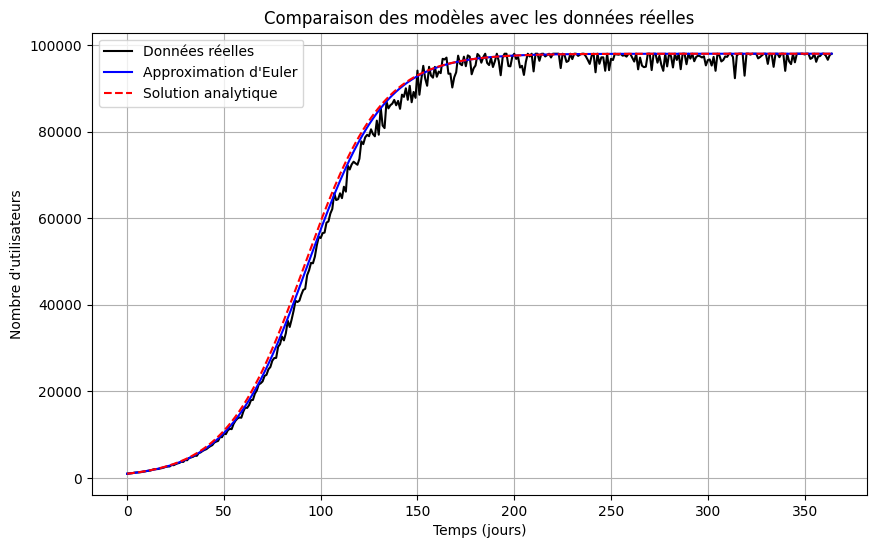

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error

# Chargement des données réelles
df = pd.read_csv("Dataset_nombre_utilisateurs.csv")
df["Jour"] = pd.to_datetime(df["Jour"])
df = df.sort_values("Jour")

# Extraction des valeurs de temps et du nombre d'utilisateurs
temps_reel = np.arange(len(df))
utilisateurs_reels = df["Utilisateurs"].values

# Paramètres du modèle recalibrés
r = 0.05  # Taux de croissance initial
K = max(utilisateurs_reels)  
P0 = utilisateurs_reels[0]

dt = 1  # Pas de temps (jours)
t_max = len(df)  
n_steps = int(t_max / dt)

# Initialisation des listes de temps et de population
P = np.zeros(n_steps)
P[0] = P0  # Condition initiale

# Simulation par la méthode d'Euler
for i in range(1, n_steps):
    P[i] = P[i-1] + dt * (r * P[i-1] * (1 - P[i-1] / K))

# Solution analytique
def logistic_solution(t, r, K, P0):
    return (K * P0) / (P0 + (K - P0) * np.exp(-r * t))

P_analytique = logistic_solution(temps_reel, r, K, P0)

# Calcul de la MSE sur différents intervalles
mse_euler = mean_squared_error(utilisateurs_reels, P)
mse_analytique = mean_squared_error(utilisateurs_reels, P_analytique)

print(f"MSE Euler : {mse_euler}")
print(f"MSE Solution analytique : {mse_analytique}")

# Tracé des courbes
plt.figure(figsize=(10,6))
plt.plot(temps_reel, utilisateurs_reels, label="Données réelles", color='k')
plt.plot(temps_reel, P, label="Approximation d'Euler", color='b')
plt.plot(temps_reel, P_analytique, label="Solution analytique", color='r', linestyle='dashed')
plt.xlabel("Temps (jours)")
plt.ylabel("Nombre d'utilisateurs")
plt.title("Comparaison des modèles avec les données réelles")
plt.legend()
plt.grid()
plt.show()

#### 1- Quand est ce qu’on atteint la phase de “saturation” :
Lorsque le nombre d'utilisateurs n'augmente plus, ici à partir du 150ème jour quand le nombre d'utilisateurs s'approche de 100000.

#### 2-  Quand est ce qu’on atteint 50% de la saturation : 
Vu que la saturation est atteinte vers les 100 000 users, donc les 50% sont atteint à environ 50 000 donc vers les 100 jours

#### 3- Pourquoi y a-t-il des écarts :
 - Cela peut etre du à des evenements exterieurs, le modèle logistique suppose que la croissance est lisse alors que ce n'est pas le cas dans la réalité
 - Le taux de croissance peut ne pas etre constant dans le temps (r)

#### 4- Hypothèses : 
un taux de croissance r(t) qui dépend du temps et d'autres facteurs comme l'effet de saisonnalité.

# PARTIE 4 (Partie pas revue)

MSE Euler avec r variable : 3434763.938178852
MSE Solution analytique : 5258889.591254078


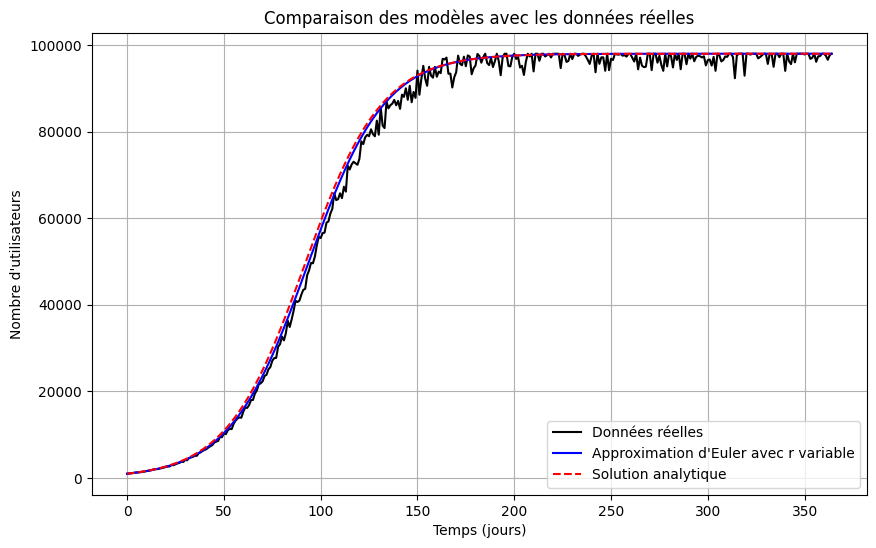

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error

# Chargement des données réelles
df = pd.read_csv("Dataset_nombre_utilisateurs.csv")
df["Jour"] = pd.to_datetime(df["Jour"])
df = df.sort_values("Jour")

# Extraction des valeurs de temps et du nombre d'utilisateurs
temps_reel = np.arange(len(df))  # Supposons que les données sont quotidiennes
utilisateurs_reels = df["Utilisateurs"].values

# Paramètres du modèle recalibrés
r0 = 0.05  # Taux de croissance initial
alpha = 0.01  # Paramètre d'atténuation
K = max(utilisateurs_reels)  # Capacité du marché estimée
P0 = utilisateurs_reels[0]  # Clients initiaux

dt = 1  # Pas de temps (jours)
t_max = len(df)  # Durée totale
n_steps = int(t_max / dt)

# Initialisation des listes de temps et de population
P = np.zeros(n_steps)
P[0] = P0  # Condition initiale

# Nouvelle fonction de taux de croissance qui peut être ajustée
def taux_croissance(t, r0, alpha, mode="exponentielle"):
    if mode == "exponentielle":
        return r0 * np.exp(-alpha * t)  # Décroissance exponentielle
    elif mode == "logistique":
        return r0 / (1 + alpha * t)  # Décroissance logistique
    else:
        return r0  # Croissance constante

# Simulation par la méthode d'Euler avec taux de croissance variable
for i in range(1, n_steps):
    r_t = taux_croissance(i, r0, alpha, mode=" Logistique") 
    P[i] = P[i-1] + dt * (r_t * P[i-1] * (1 - P[i-1] / K))

# Solution analytique avec taux de croissance constant
def logistic_solution(t, r, K, P0):
    return (K * P0) / (P0 + (K - P0) * np.exp(-r * t))

P_analytique = logistic_solution(temps_reel, r0, K, P0)

# Calcul de la MSE sur différents intervalles
mse_euler = mean_squared_error(utilisateurs_reels, P)
mse_analytique = mean_squared_error(utilisateurs_reels, P_analytique)

print(f"MSE Euler avec r variable : {mse_euler}")
print(f"MSE Solution analytique : {mse_analytique}")

# Tracé des courbes
plt.figure(figsize=(10,6))
plt.plot(temps_reel, utilisateurs_reels, label="Données réelles", color='k')
plt.plot(temps_reel, P, label="Approximation d'Euler avec r variable", color='b')
plt.plot(temps_reel, P_analytique, label="Solution analytique", color='r', linestyle='dashed')
plt.xlabel("Temps (jours)")
plt.ylabel("Nombre d'utilisateurs")
plt.title("Comparaison des modèles avec les données réelles")
plt.legend()
plt.grid()
plt.show()


#### Note : 
r_t = taux_croissance(i, r0, alpha, mode=" Logistique") -> en ajustant le parametre mode = "exponentielle" l'approximation d'euler baisse et s'éloigne des données réelles.


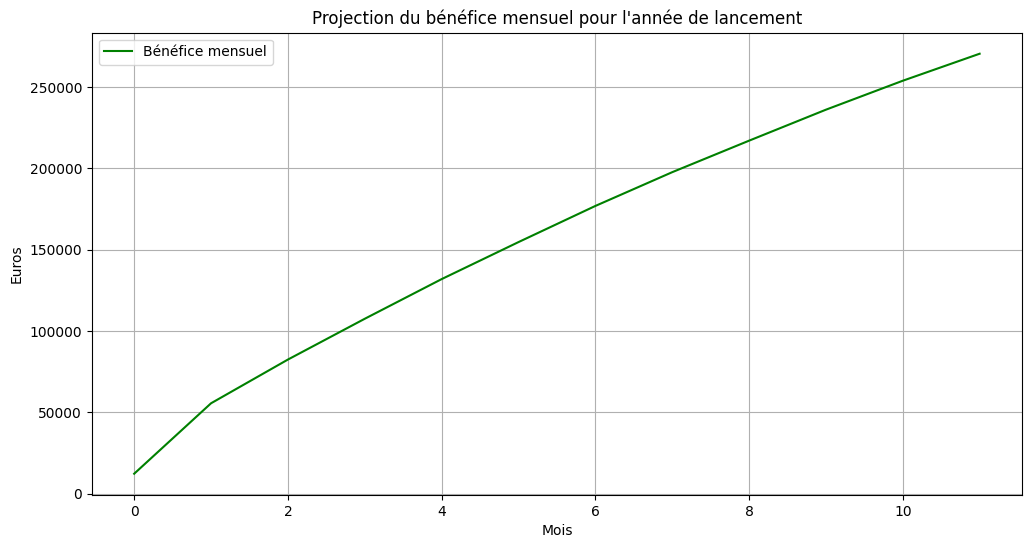

Bénéfice total sur l'année de lancement: 1896095.46 euros


In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres
prix_serveur = 1000  # Coût par serveur par mois
utilisateurs_max = 400000  # Taille du marché
part_marche = 0.20  # Part de marché estimée
prix_abonnement = 11.99  # Prix de l'abonnement mensuel
utilisateurs_initial = 500  # Nombre initial d'utilisateurs
croissance_initial = 0.05  # Croissance initiale estimée (par mois)
acquisition_par_utilisateur = 10  # Coût marketing par utilisateur
budget_marketing = 50000  # Budget marketing total
part_campagne_lancement = 0.35  # Part de campagne branding au lancement
coût_marketing_mensuel_post_lancement = (budget_marketing * (1 - part_campagne_lancement)) / 11
coût_marketing_lancement = budget_marketing * part_campagne_lancement

# Initialisation
utilisateurs = np.zeros(12)
chiffre_affaire = np.zeros(12)
cout_serveur = np.zeros(12)
cout_marketing = np.zeros(12)
bénéfice = np.zeros(12)

# Nombre d'utilisateurs au lancement
utilisateurs[0] = utilisateurs_initial

# Calcul pour chaque mois
for t in range(12):
    if t == 0:  # Lancement
        utilisateurs[t] = utilisateurs_initial + (utilisateurs_max - utilisateurs_initial) * croissance_initial
        cout_marketing[t] = coût_marketing_lancement + utilisateurs[t] * acquisition_par_utilisateur
    else:
        utilisateurs[t] = utilisateurs[t-1] + (utilisateurs_max - utilisateurs[t-1]) * croissance_initial
        cout_marketing[t] = coût_marketing_mensuel_post_lancement + utilisateurs[t] * acquisition_par_utilisateur
    
    # Chiffre d'affaires
    chiffre_affaire[t] = utilisateurs[t] * prix_abonnement
    
    # Nombre de serveurs nécessaires
    nb_serveurs = np.ceil(utilisateurs[t] / 2000)
    cout_serveur[t] = nb_serveurs * prix_serveur
    
    # Calcul du bénéfice
    bénéfice[t] = chiffre_affaire[t] - cout_serveur[t] - cout_marketing[t]

# Affichage des résultats
plt.figure(figsize=(12, 6))
plt.plot(range(12), bénéfice, label='Bénéfice mensuel', color='g')
plt.xlabel("Mois")
plt.ylabel("Euros")
plt.title("Projection du bénéfice mensuel pour l'année de lancement")
plt.legend()
plt.grid(True)
plt.show()

bénéfice_total = np.sum(bénéfice)
print(f"Bénéfice total sur l'année de lancement: {bénéfice_total:.2f} euros")
